In [2]:
import sys
sys.path.append("/home/zoso/spark-3.4.3-bin-hadoop3/python")
from pyspark.sql import SparkSession


> **sys.path.append("/home/zoso/spark-3.4.3-bin-hadoop3/python"):** This line appends a directory to the Python interpreter's search path. It adds the directory "/home/zoso/spark-3.4.3-bin-hadoop3/python" to the list of directories where Python looks for modules to import

In [3]:
# Create SparkSession
spark = SparkSession.builder \
      .master("local[1]") \
      .appName("SparkByExamples.com") \
      .getOrCreate()


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/04/29 16:16:58 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


## Create DataFrame


In [4]:
# Test the setup
data = [("Alice", 25), ("Bob", 30), ("Charlie", 35)]
df = spark.createDataFrame(data, ["Name", "Age"])
df.show()


+-------+---+
|   Name|Age|
+-------+---+
|  Alice| 25|
|    Bob| 30|
|Charlie| 35|
+-------+---+



In [5]:
# Stop current session
spark.stop()

# Theory
> Basics 

## Spark Context and Session
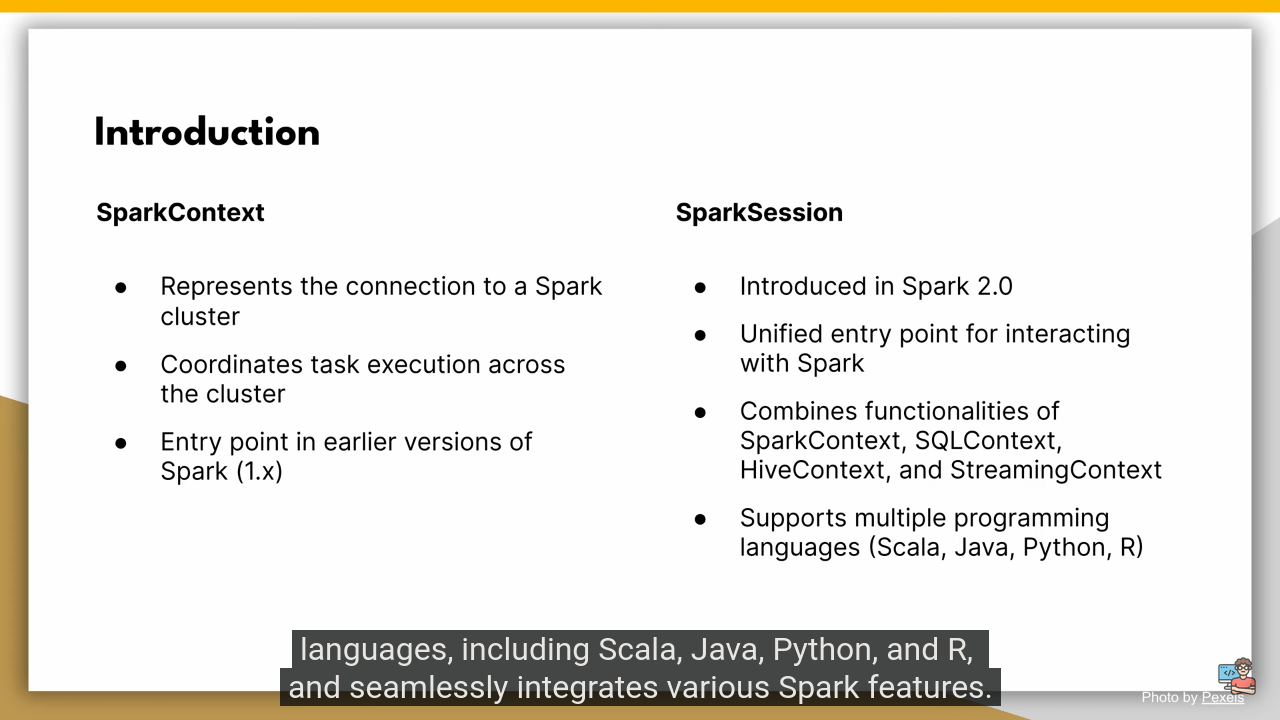

## Differences

> **Spark Session** extends the functionalitz of *Spark Context*
<br>

> With **Spark Context** you define low level programming, lets you only create RDDs and perform Transformation (SQL alike)
<br>

>**Spark Session** introduce higher lever abstractions like <mark>DataFrames</mark> and DataSet, also supports SQL querying, also provides tools like data source APIs, ML algos and Streaming capabilities



basically the modern is Spark Session, and is the recommended to use

## Spark Context
> Spark 1.x 

In [6]:
from pyspark import SparkContext

# Create and Spark Context Object
sc = SparkContext(appName="SparkApplication")

In [7]:
sc

<SparkContext master=local[1] appName=SparkApplication>

> Spark UI is a web-based GUI that offers insights into the status of and performance of apache spark applications. <br>
> **provides info about**
> * jobs
> * stages
> * executors
> * SQL queries 
> * store

In [8]:
sc.stop()

## Spark Context
> Spark version 2.X and later

In [9]:
from pyspark.sql import SparkSession

# Create a SparkSession
# 
spark = SparkSession.builder \
    .appName("MySparkApplication") \
    .getOrCreate()

# Get the SparkContext from the SparkSession
sc = spark.sparkContext

> The **builder object** allows us to set varios configuration options for the session. appName acts as a unique identifier. <br>
> Finally (always at the end) **getOrCreate** method is used to obtain a *Spark Session* instance

In [10]:
sc

<SparkContext master=local[1] appName=MySparkApplication>

In [11]:
sc.stop()

### More options
**.config()** allows you to set 
* master URL
* set proprierties
* Add Pckgs
* more (specific to the session)
<br>
> 2g set memory to 2 GB <br>
> shuffle partitions = 2 

In [12]:
# Create a SparkSession
spark = SparkSession.builder \
    .appName("MySparkApplication") \
    .config("spark.executor.memory", "2g") \
    .config("spark.sql.shuffle.partitions", "4") \
    .getOrCreate()

In [13]:
spark

> go to spark UI and and look on the environment tab, in there you can see the whole config, including the shuffle = 4 and memory = 2gb 
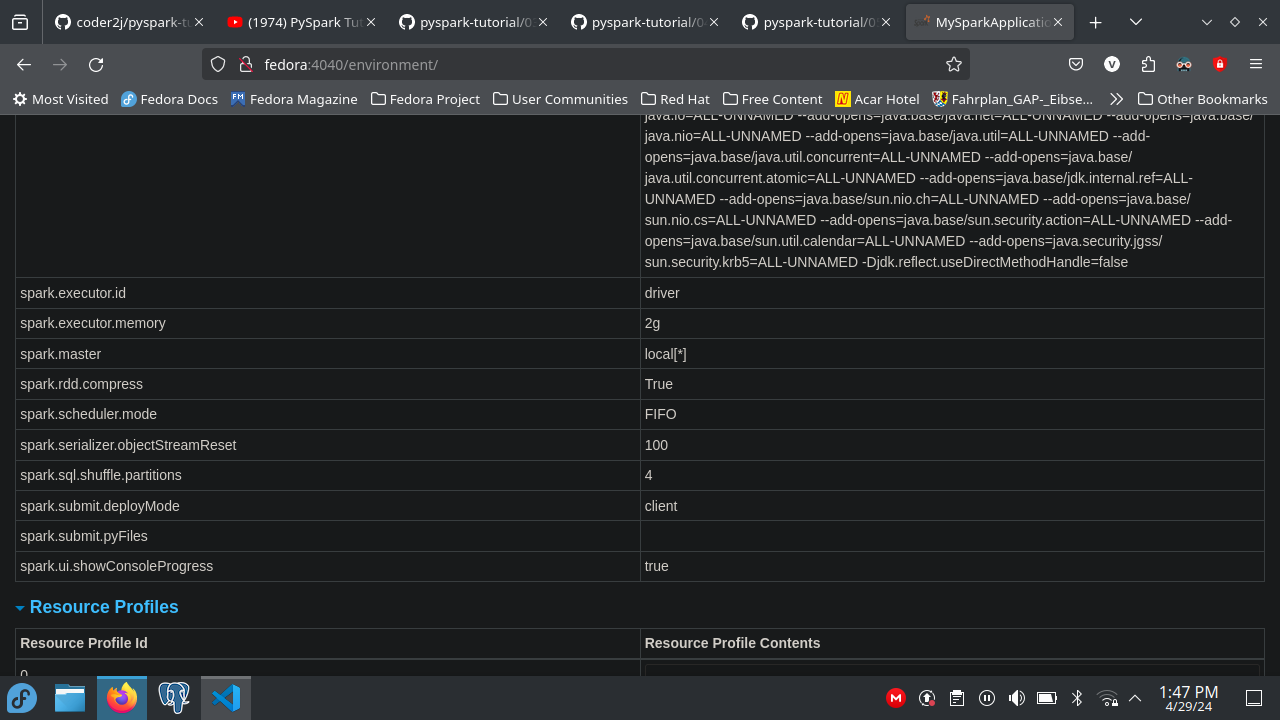

In [14]:
spark.stop() 

> spark.stop() also close the session and any job in the background

# RDD
> its the backbone of data processing of Spark, it is fault-tolerant, distributed, and //
* it process large datasets across a cluster of machines 

Characteristics
-----------------

* they are inmutable, onces created cannot be modified, agg/transformations > create new RDDs
* Spark automatically partitions the data and distributes it across nodes
* They are fault-tolerant: Spark keeps track of the transfo applied to RDD allowing it to recover lost data and continue computations in case of failures
* Lazy evaluated: means they are executed when sparks decides its necessary (for example: in the event of an action (no futher delay is possible)) 
* Fault tolerant: actions like collect and save enables to retrieve/write data to external storage

2 types of operations
* **Transformations:** they create new RDDs, lazy evaluation (*they are only executed when an action is called*)
    * map, filter, reduceByKey, sortBy, join 
* **Actions:** they are performed over an RDD (or return results), eager evaluation (computed immediately)
    * collect, count, save, first, foreach, take

### how to create RDD

In [15]:
# create spark session
spark = SparkSession.builder.appName("RddsDemo").getOrCreate()


In [16]:
# RDDs can be created by existing collection or by 
# parallelizing existing collection 
numbers = [1,2,3,4,5]
rdd = spark.sparkContext.parallelize(numbers)
rdd


ParallelCollectionRDD[0] at readRDDFromFile at PythonRDD.scala:287

In [17]:
# Collect = retrieve all elements from RDD
rdd.collect()

[1, 2, 3, 4, 5]

In [18]:
# another example
data = [("Alice", 25), ("Bob", 30), ("Charlie", 35), ("Alice", 40)]
newRDD = spark.sparkContext.parallelize(data)

In [19]:
print(f"this are all the elements {newRDD.collect()}")

this are all the elements [('Alice', 25), ('Bob', 30), ('Charlie', 35), ('Alice', 40)]


### Actions
* **count**: gets the number of elements on a rdd
* **first:** gives the first element of rdd
* **take:** retrieve the first n elements from a RDD
* **foreach:** allows to apply a function to every element from an RDD

In [20]:
print(f"the total number of elements is {newRDD.count()}")

the total number of elements is 4


In [21]:
print("The first element of the rdd: ", newRDD.first())

The first element of the rdd:  ('Alice', 25)


In [22]:
print("The first two elements of the rdd: ", newRDD.take(2))

The first two elements of the rdd:  [('Alice', 25), ('Bob', 30)]


In [23]:
newRDD.foreach(lambda x: print(x[0], "is yo", x[1]))

Alice is yo 25
Bob is yo 30
Charlie is yo 35
Alice is yo 40


### Transformations
recall: lazy evaluation, they are not performed until an action is called, they create new RDDs

In [24]:
# 1) the transformation
az = newRDD.map(lambda x: (x[0].upper(), x[1]))
az

PythonRDD[6] at RDD at PythonRDD.scala:53

In [25]:
# 2) action
print("rdd with uppercease name: ", az.collect())

rdd with uppercease name:  [('ALICE', 25), ('BOB', 30), ('CHARLIE', 35), ('ALICE', 40)]


In [26]:
# Filter transformation: Filter records where age is greater than 30
filtered_rdd = newRDD.filter(lambda x: x[1] > 30)
filtered_rdd.collect()

[('Charlie', 35), ('Alice', 40)]

In [27]:
# ReduceByKey: Groups and agg over the same key (look ALICE)
reduced_rdd = newRDD.reduceByKey(lambda x, y: x + y)
reduced_rdd.collect()

[('Alice', 65), ('Bob', 30), ('Charlie', 35)]

In [28]:
# SortBy transformation: Sort the RDD by age in descending order
sorted_rdd = newRDD.sortBy(lambda x: x[1], ascending=False)
sorted_rdd.collect()

[('Alice', 40), ('Charlie', 35), ('Bob', 30), ('Alice', 25)]

# Save

> each element of the RDD is converted to a string and written as a separate line 

In [29]:
# Save action: Save the RDD to a text file
newRDD.saveAsTextFile("output.txt")

Py4JJavaError: An error occurred while calling o272.saveAsTextFile.
: org.apache.hadoop.mapred.FileAlreadyExistsException: Output directory file:/home/zoso/pyspark/intro/output.txt already exists
	at org.apache.hadoop.mapred.FileOutputFormat.checkOutputSpecs(FileOutputFormat.java:131)
	at org.apache.spark.internal.io.HadoopMapRedWriteConfigUtil.assertConf(SparkHadoopWriter.scala:299)
	at org.apache.spark.internal.io.SparkHadoopWriter$.write(SparkHadoopWriter.scala:71)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$saveAsHadoopDataset$1(PairRDDFunctions.scala:1091)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:408)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopDataset(PairRDDFunctions.scala:1089)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$saveAsHadoopFile$4(PairRDDFunctions.scala:1062)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:408)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopFile(PairRDDFunctions.scala:1027)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$saveAsHadoopFile$3(PairRDDFunctions.scala:1009)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:408)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopFile(PairRDDFunctions.scala:1008)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$saveAsHadoopFile$2(PairRDDFunctions.scala:965)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:408)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopFile(PairRDDFunctions.scala:963)
	at org.apache.spark.rdd.RDD.$anonfun$saveAsTextFile$2(RDD.scala:1596)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:408)
	at org.apache.spark.rdd.RDD.saveAsTextFile(RDD.scala:1596)
	at org.apache.spark.rdd.RDD.$anonfun$saveAsTextFile$1(RDD.scala:1582)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:408)
	at org.apache.spark.rdd.RDD.saveAsTextFile(RDD.scala:1582)
	at org.apache.spark.api.java.JavaRDDLike.saveAsTextFile(JavaRDDLike.scala:564)
	at org.apache.spark.api.java.JavaRDDLike.saveAsTextFile$(JavaRDDLike.scala:563)
	at org.apache.spark.api.java.AbstractJavaRDDLike.saveAsTextFile(JavaRDDLike.scala:45)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:77)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:568)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:842)


> creating and RDD from a external source

In [ ]:
# create rdd from text file
rdd_text = spark.sparkContext.textFile("output.txt")
rdd_text.collect()

["('Alice', 25)", "('Charlie', 35)", "('Alice', 40)", "('Bob', 30)"]

In [ ]:
# Shut down spark session
spark.stop()

DataFrames
--------------
and theirs adventages over rdds

* **DataFrames** are abstractions 
* They are similar to SQL tables (rows and columns)
* They have an **schema** 


### Advantages over Rdds
* **optimized execution**
    * schema information enables query optimization
    * Faster and more efficient data processing
* **Easy to Use**
    * high level: SQL-alike interface
* **Integration**
    * integrates seamless with **spark ecosysten** SparkSQL, MLib, GraphX 
    * built-in optimization like Spark Catalyst
* **Interoperability**
    * Easily convert to pandas df


In [ ]:
from pyspark.sql.functions import desc

In [ ]:
df = spark.read.text("./data/data.txt")

result_df = df.selectExpr("explode(split(value, ' ')) as word") \
    .groupBy("word").count().orderBy(desc("count"))

Py4JJavaError: An error occurred while calling o109.read.
: java.lang.IllegalStateException: LiveListenerBus is stopped.
	at org.apache.spark.scheduler.LiveListenerBus.addToQueue(LiveListenerBus.scala:98)
	at org.apache.spark.scheduler.LiveListenerBus.addToStatusQueue(LiveListenerBus.scala:81)
	at org.apache.spark.sql.internal.SharedState.<init>(SharedState.scala:115)
	at org.apache.spark.sql.SparkSession.$anonfun$sharedState$1(SparkSession.scala:144)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.sql.SparkSession.sharedState$lzycompute(SparkSession.scala:144)
	at org.apache.spark.sql.SparkSession.sharedState(SparkSession.scala:143)
	at org.apache.spark.sql.SparkSession.$anonfun$sessionState$2(SparkSession.scala:163)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.sql.SparkSession.sessionState$lzycompute(SparkSession.scala:161)
	at org.apache.spark.sql.SparkSession.sessionState(SparkSession.scala:158)
	at org.apache.spark.sql.DataFrameReader.<init>(DataFrameReader.scala:699)
	at org.apache.spark.sql.SparkSession.read(SparkSession.scala:710)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:77)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:568)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:842)
